In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [5]:
# Chargement des doonnée et nettoyage
def load_and_clean_data(filepath):
    df = pd.read_csv(filepath, encoding="ISO-8859-1")
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df.dropna(subset=['Fatalities', 'Aboard'], inplace=True)
    df.fillna({'Location': 'Unknown', 'Operator': 'Unknown', 'AC Type': 'Unknown'}, inplace=True)
    return df




In [6]:
# Exploration des Data
def exploratory_data_analysis(df):
    print(f"Total Crashes: {df.shape[0]}")
    print(f"Total Fatalities: {df['Fatalities'].sum()}")
    survival_rate = (1 - df['Fatalities'].sum() / df['Aboard'].sum()) * 100
    print(f"Survival Rate: {survival_rate:.2f}%")
    
    crashes_per_year = df.groupby('Year').size()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values, marker="o", color="b")
    plt.xlabel("Year")
    plt.ylabel("Number of Crashes")
    plt.title("Trend of Airplane Crashes Over Time")
    plt.show()



In [7]:
# Analyse statistique
def statistical_analysis(df):
    print(f"Mean Fatalities: {df['Fatalities'].mean():.2f}")
    print(f"Median Fatalities: {df['Fatalities'].median()}")
    print(f"Standard Deviation: {df['Fatalities'].std():.2f}")
    
    early_period = df[(df['Year'] >= 1908) & (df['Year'] <= 1950)]['Fatalities']
    later_period = df[(df['Year'] > 1950)]['Fatalities']
    t_stat, p_value = stats.ttest_ind(early_period, later_period, equal_var=False)
    print(f"T-test: t-stat = {t_stat:.2f}, p-value = {p_value:.5f}")



In [8]:
# Data Visualisation
def visualize_data(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Fatalities'], bins=30, kde=True, color="red")
    plt.xlabel("Fatalities per Crash")
    plt.ylabel("Frequency")
    plt.title("Distribution of Fatalities per Crash")
    plt.show()
    
    df['Decade'] = (df['Year'] // 10) * 10
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Decade', y='Fatalities', data=df, estimator=np.mean, ci=None)
    plt.xticks(rotation=45)
    plt.title("Average Fatalities per Crash by Decade")
    plt.show()



Total Crashes: 4980
Total Fatalities: 111561.0
Survival Rate: 28.19%


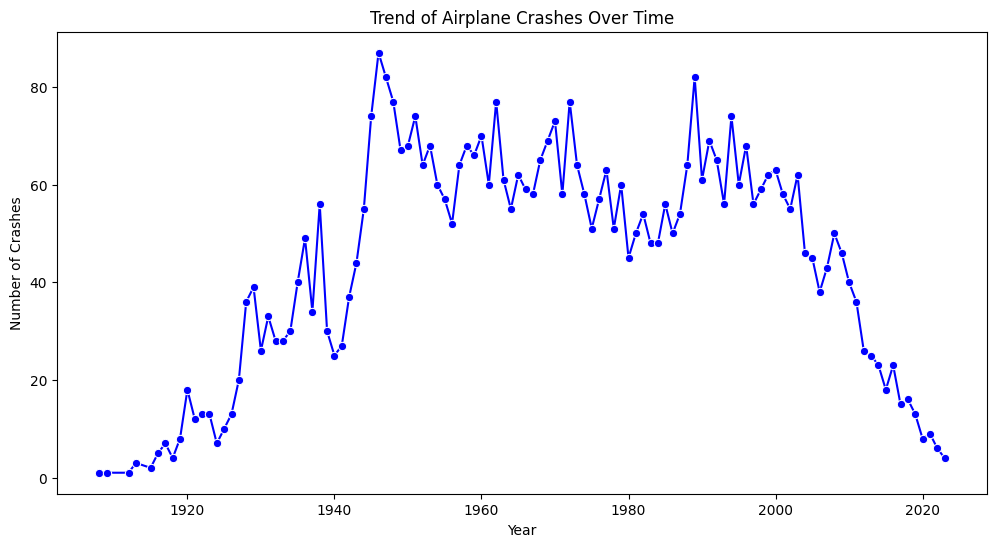

Mean Fatalities: 22.40
Median Fatalities: 11.0
Standard Deviation: 35.09
T-test: t-stat = -20.94, p-value = 0.00000


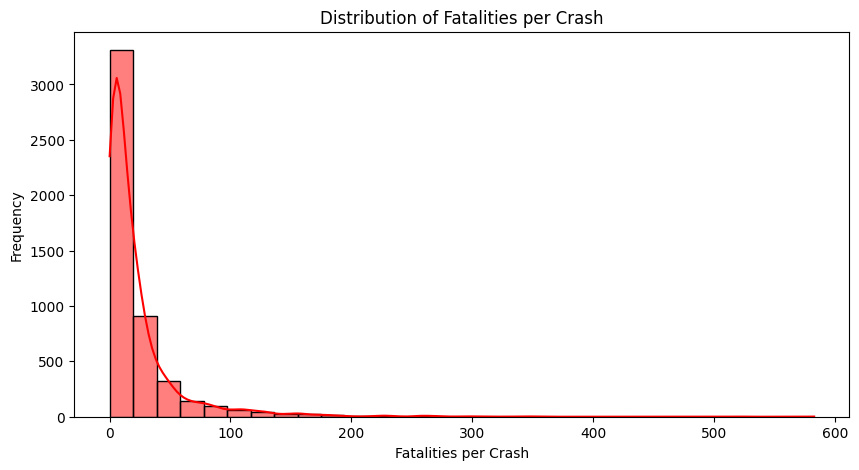

C:\Users\bintu\AppData\Local\Temp\ipykernel_6780\2158052597.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Decade', y='Fatalities', data=df, estimator=np.mean, ci=None)


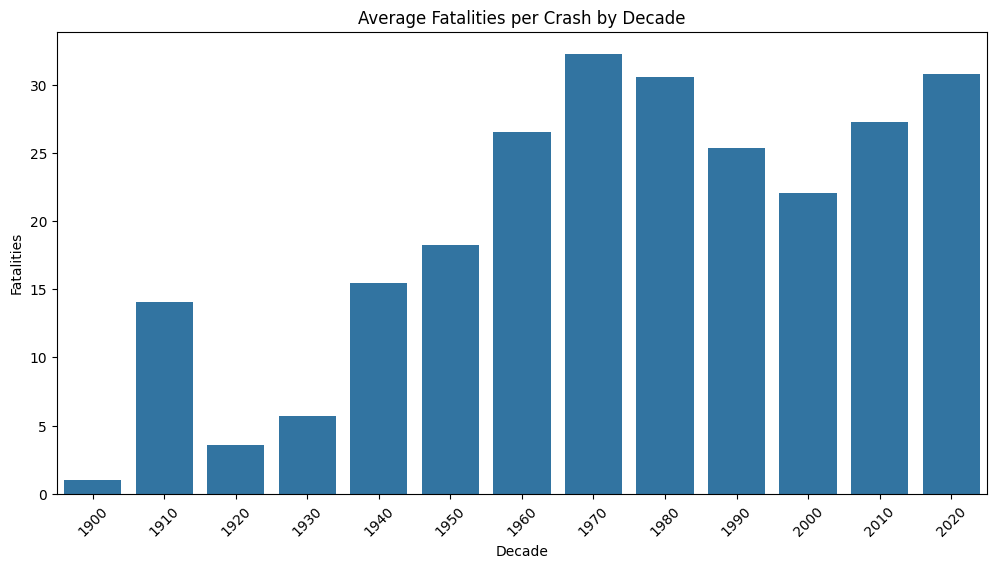

In [9]:
# Main function to execute all steps
def main():
    filepath = 'Airplane.csv'
    # "/mnt/data/airplane_crashes_data/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv"
    df = load_and_clean_data(filepath)
    exploratory_data_analysis(df)
    statistical_analysis(df)
    visualize_data(df)

if __name__ == "__main__":
    main()